In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
data=pd.read_csv('Telco Customer Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590VHVEG,Female,0,Yes,No,1,No,Nophoneservice,DSL,No,...,No,No,No,No,Monthtomonth,Yes,Electroniccheck,29.85,29.85,No
1,5575GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,Oneyear,No,Mailedcheck,56.95,1889.50,No
2,3668QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthtomonth,Yes,Mailedcheck,53.85,108.15,Yes
3,7795CFOCW,Male,0,No,No,45,No,Nophoneservice,DSL,Yes,...,Yes,Yes,No,No,Oneyear,No,Banktransfer(automatic),42.30,1840.75,No
4,9237HQITU,Female,0,No,No,2,Yes,No,Fiberoptic,No,...,No,No,No,No,Monthtomonth,Yes,Electroniccheck,70.70,151.65,Yes


# Telco Customer Churn Variables
*   **customerID** Customer ID
*   **gender** Whether the customer is a male or a female
*   **SeniorCitizen** Whether the customer is a senior citizen or not (1, 0)
*   **Partner** Whether the customer has a partner or not (Yes, No)
*   **Dependents** Whether the customer has dependents or not (Yes, No)
*   **tenure** Number of months the customer has stayed with the company
*   **PhoneService** Whether the customer has a phone service or not (Yes, No)
*  **MultipleLines** Whether the customer has multiple lines or not (Yes, No, No phone service)
*   **InternetService** Customer’s internet service provider (DSL, Fiber optic, No)
*   **OnlineSecurity** Whether the customer has online security or not (Yes, No, No internet service)
*   **OnlineBackup** Whether the customer has online backup or not (Yes, No, No internet service)
*   **DeviceProtection** Whether the customer has device protection or not (Yes, No, No internet service)
*   **TechSupport** Whether the customer has tech support or not (Yes, No, No internet service)
*   **StreamingTV** Whether the customer has streaming TV or not (Yes, No, No internet service)
*   **StreamingMovies** Whether the customer has streaming movies or not (Yes, No, No internet service)
*   **Contract** The contract term of the customer (Month-to-month, One year, Two year)
*   **PaperlessBilling** Whether the customer has paperless billing or not (Yes, No)
*   **PaymentMethod** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
*   **MonthlyCharges** The amount charged to the customer monthly
*   **TotalCharges** The total amount charged to the customer
*   **Churn ** Whether the customer churned or not (Yes or No)















##Predict variable
Churn Whether the customer churned or not (Yes or No)

In [4]:
data=pd.read_csv('Telco Customer Churn.csv',header=0)
print(data.shape)
print(list(data.columns))

(7043, 21)
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [6]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Data Preprocessing
check missing value

In [7]:
np.sum(data.isnull())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#imputasi data
#data kontinyu di imutasi dengan mean
from scipy.stats import mode
for column in data.columns:
    if (data[column].dtype == np.float64):
        mean = np.mean(data[column])
        data[column].fillna(mean, inplace=True)
np.sum(data.isnull())

#data kategorok di imutasi dengan modus
##for column in data.columns:
##    if (data[column].dtype == np.object):
##        modus = mode(data[column])
##        data[column].fillna(modus.mode[0], inplace=True)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Exploration

In [10]:
data.groupby('Churn').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128721,37.569965,61.265124,2554.765772
Yes,0.254682,17.979133,74.441332,1531.796094


## bar chart

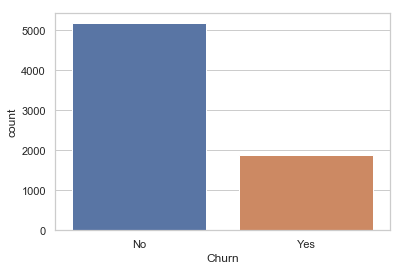

In [12]:
sns.countplot(x='Churn',data=data)
plt.show()

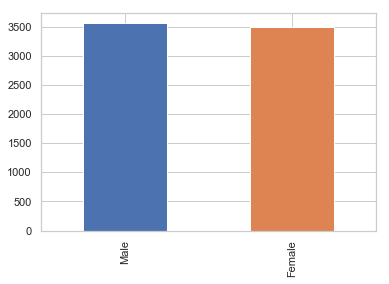

In [13]:
data['gender'].value_counts().plot(kind="bar")

### buat bar chart pada variabel-variabel lain

## Pie Chart

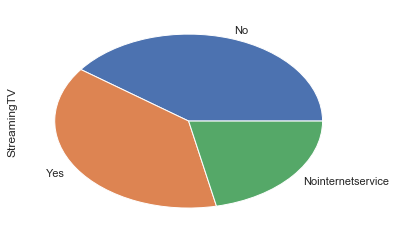

In [17]:
data['StreamingTV'].value_counts().plot(kind="pie")

### buat pie chart pada variabel-variabel lain

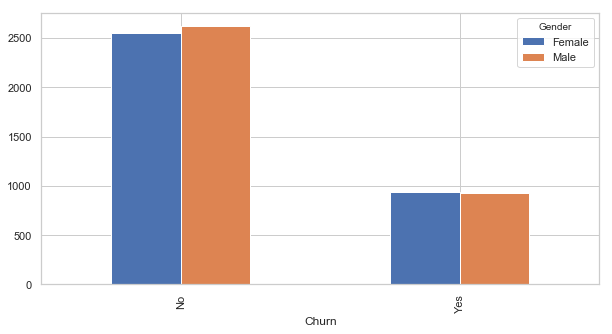

In [18]:
pd.crosstab(data['Churn'],data['gender'], rownames=['Churn'], colnames=['Gender']).plot(kind='bar',figsize=(10,5))
plt.show()

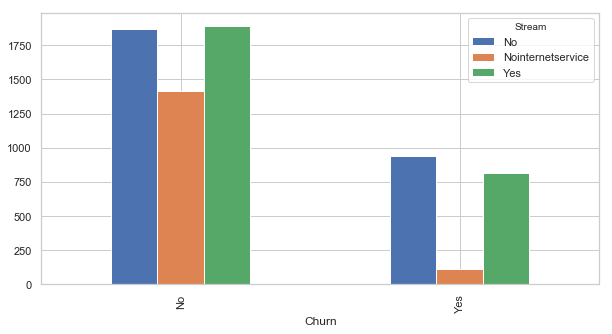

In [19]:
pd.crosstab(data['Churn'],data['StreamingTV'], rownames=['Churn'], colnames=['Stream']).plot(kind='bar',figsize=(10,5))
plt.show()

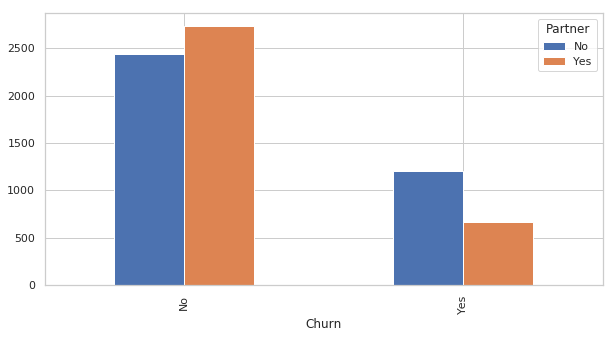

In [0]:
pd.crosstab(data['Churn'],data['Partner'], rownames=['Churn'], colnames=['Partner']).plot(kind='bar',figsize=(10,5))
plt.show()

### buat crosstab untuk variabel yang lain
'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'

In [20]:
#menghilangkan Customer ID
data_baru=data.drop(data.columns[[0]],axis=1)
data_baru.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,Nophoneservice,DSL,No,Yes,No,No,No,No,Monthtomonth,Yes,Electroniccheck,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Oneyear,No,Mailedcheck,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthtomonth,Yes,Mailedcheck,53.85,108.15,Yes
3,Male,0,No,No,45,No,Nophoneservice,DSL,Yes,No,Yes,Yes,No,No,Oneyear,No,Banktransfer(automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiberoptic,No,No,No,No,No,No,Monthtomonth,Yes,Electroniccheck,70.70,151.65,Yes


In [21]:
print(list(data_baru.columns))

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [22]:
dummy_y = pd.get_dummies(data_baru['Churn'], prefix='Churn')
data = data_baru.join(dummy_y.loc[:, 'Churn_Yes':])

In [23]:
data=data.drop(data.columns[[19]],axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Yes
0,Female,0,Yes,No,1,No,Nophoneservice,DSL,No,Yes,No,No,No,No,Monthtomonth,Yes,Electroniccheck,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Oneyear,No,Mailedcheck,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthtomonth,Yes,Mailedcheck,53.85,108.15,1
3,Male,0,No,No,45,No,Nophoneservice,DSL,Yes,No,Yes,Yes,No,No,Oneyear,No,Banktransfer(automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiberoptic,No,No,No,No,No,No,Monthtomonth,Yes,Electroniccheck,70.70,151.65,1


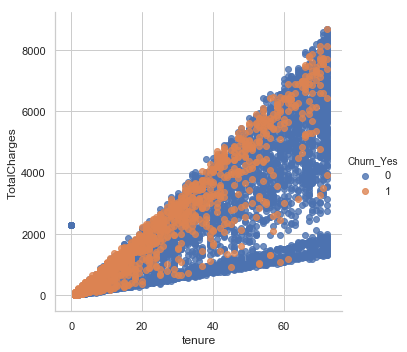

In [24]:
sns.lmplot(x='tenure', y='TotalCharges', hue='Churn_Yes',fit_reg=False, data=data)

# Create dummy variables
membuat variabel kategorik menjadi 0 dan 1

In [25]:
cat_vars=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
          'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
          'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for var in cat_vars:
  cat_list='var'+'_'+var
  cat_list = pd.get_dummies(data[var], prefix=var)
  data1=data.join(cat_list)
  data=data1
  
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
data_final.columns.values

array(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Yes',
       'gender_Female', 'gender_Male', 'SeniorCitizen_0',
       'SeniorCitizen_1', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_Nophoneservice',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiberoptic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Nointernetservice',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Nointernetservice', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Nointernetservice',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Nointernetservice', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Nointernetservice',
       'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Nointernetservice', 'StreamingMovies_Yes',
       'Contract_Monthtomonth', 'Contract_Oneyear',

menghilangkan k dummy variabel menjadi k-1 dummy variabel 

> Pada regresi logistik, misalkan variabel dummy memiliki 2 kategori, maka akan dibentuk 1 kolom kategori 0 dan 1, maka dari itu k dummy variabel menjadi k-1 dummy variabel



In [26]:
data_final=data_final.drop(['gender_Male','SeniorCitizen_0','Partner_No','Dependents_No','PhoneService_No','MultipleLines_No',
                           'InternetService_DSL','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                           'StreamingTV_No', 'StreamingMovies_No','Contract_Monthtomonth','PaperlessBilling_No',
                            'PaymentMethod_Banktransfer(automatic)'], axis=1)
data_final.columns.values

array(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Yes',
       'gender_Female', 'SeniorCitizen_1', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Nophoneservice', 'MultipleLines_Yes',
       'InternetService_Fiberoptic', 'InternetService_No',
       'OnlineSecurity_Nointernetservice', 'OnlineSecurity_Yes',
       'OnlineBackup_Nointernetservice', 'OnlineBackup_Yes',
       'DeviceProtection_Nointernetservice', 'DeviceProtection_Yes',
       'TechSupport_Nointernetservice', 'TechSupport_Yes',
       'StreamingTV_Nointernetservice', 'StreamingTV_Yes',
       'StreamingMovies_Nointernetservice', 'StreamingMovies_Yes',
       'Contract_Oneyear', 'Contract_Twoyear', 'PaperlessBilling_Yes',
       'PaymentMethod_Creditcard(automatic)',
       'PaymentMethod_Electroniccheck', 'PaymentMethod_Mailedcheck'],
      dtype=object)

In [27]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
tenure                                 7043 non-null int64
MonthlyCharges                         7043 non-null float64
TotalCharges                           7043 non-null float64
Churn_Yes                              7043 non-null uint8
gender_Female                          7043 non-null uint8
SeniorCitizen_1                        7043 non-null uint8
Partner_Yes                            7043 non-null uint8
Dependents_Yes                         7043 non-null uint8
PhoneService_Yes                       7043 non-null uint8
MultipleLines_Nophoneservice           7043 non-null uint8
MultipleLines_Yes                      7043 non-null uint8
InternetService_Fiberoptic             7043 non-null uint8
InternetService_No                     7043 non-null uint8
OnlineSecurity_Nointernetservice       7043 non-null uint8
OnlineSecurity_Yes                     7043 non-null uint8
Onli

# Over-sampling using SMOTE
Synthetic Minority Oversampling Technique

> Dengan data Training yang dibuat, akan diambil sampel dari kelas yang minor 


1.   Membuat sampel sintetis dari kelas minor dan membuat salinan.
     
2.   Secara acak memilih salah satu k-nearest neighbor  dan menggunakannya untuk membuat pengamatan baru yang serupa, tetapi di-tweak secara acak.

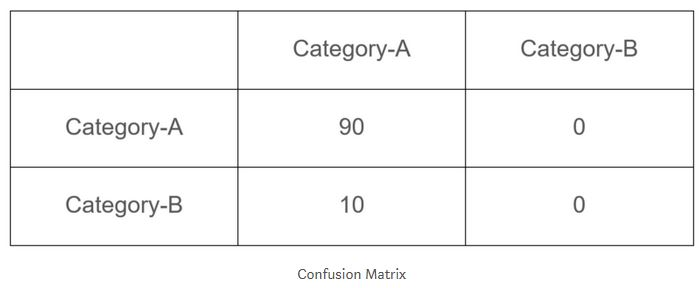

In [28]:
from IPython.display import Image, display
display(Image('Capture.JPG'))

In [29]:
X = data_final.loc[:, data_final.columns != 'Churn_Yes']
y = data_final.loc[:, data_final.columns == 'Churn_Yes']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Churn_No in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of Churn_Yes",len(os_data_y[os_data_y['y']==1]))
print("Proportion of Churn_No data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of Churn_Yes data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  7228
Number of Churn_No in oversampled data 3614
Number of Churn_Yes 3614
Proportion of Churn_No data in oversampled data is  0.5
Proportion of Churn_Yes data in oversampled data is  0.5


C:\Users\asus\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Now we have a perfect balanced data! 

# Recursive Feature Elimination (RFE)
ide awal RFE adalah membuat model secara iteratif dan memilih variabel yang memiliki performance baik atau tidak. Tujuan RFE adalah untuk memilih variabel dengan secara rekursif mempertimbangkan variabel yang lebih kecil.

In [30]:
data_final_vars=data_final.columns.values.tolist()
y=['Churn_Yes']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 10)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\asus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarn

[False False False False False False  True False False False  True False
 False  True  True  True False False False False  True False False False
  True  True  True False  True False]
[16 18 21 20  7 17  1 15  9 14  1  6  4  1  1  1 10 19 12  2  1  5  8 11
  1  1  1 13  1  3]


RFE mambantu uuntuk memilih variabel, variabel yang terpilih adalah :
>        'Dependents_Yes',
       'InternetService_Fiberoptic', 'OnlineSecurity_Yes',
       'StreamingTV_Nointernetservice','Contract_Oneyear', 
       'Contract_Twoyear', 'PaperlessBilling_Yes',
       'PaymentMethod_Electroniccheck'



# Implementing the Logistic Regression model

In [36]:
#cols=[ 'tenure','MonthlyCharges', 'TotalCharges','SeniorCitizen_1', 'Dependents_Yes', 'MultipleLines_Nophoneservice',
# 'InternetService_Fiberoptic', 'InternetService_No',
# 'OnlineSecurity_Nointernetservice', 'OnlineSecurity_Yes',
# 'OnlineBackup_Nointernetservice', 'OnlineBackup_Yes',
# 'DeviceProtection_Nointernetservice',
# 'TechSupport_Yes', 'StreamingTV_Nointernetservice',
# 'StreamingTV_Yes', 'StreamingMovies_Nointernetservice',
# 'StreamingMovies_Yes', 'Contract_Oneyear',
# 'Contract_Twoyear', 'PaperlessBilling_Yes',
# 'PaymentMethod_Electroniccheck', 'PaymentMethod_Mailedcheck'] 
cols=[ 'Dependents_Yes',
   'InternetService_Fiberoptic', 'OnlineSecurity_Yes',
   'StreamingTV_Nointernetservice','Contract_Oneyear', 
   'Contract_Twoyear', 'PaperlessBilling_Yes',
   'PaymentMethod_Electroniccheck']
X=os_data_X[cols]
y=os_data_y['y']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7228
Model:                          Logit   Df Residuals:                     7220
Method:                           MLE   Df Model:                            7
Date:                Sat, 27 Apr 2019   Pseudo R-squ.:                     inf
Time:                        06:20:41   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Dependents_Yes                   -0.3853      0.074     -5.236      0.000  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


lihat pada kolom P-values,jika masih ada p-value yang dihasilkan yaitu nan, maka dari itu variabel tersebut dihilangkan, kemudian dibuat modelnya lagi

lihat pada kolom P-values, semua variabel sudah kurang dari 0.05, maka model yang terbentuk adalah variabel yang signifikan(pvalue < 0.05)

# Logistic Regression Classifier

## jika menggunakan data keseluruhan

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = data_final.loc[:, data_final.columns != 'Churn_Yes']
y = data_final.loc[:, data_final.columns == 'Churn_Yes']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\asus\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\asus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1399  161]
 [ 257  296]]


## jika menggunakan data dengan variabel yang signifikan hasil model Regresi Logistik

In [40]:
cols=[ 'Dependents_Yes',
       'InternetService_Fiberoptic', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes','Contract_Oneyear', 
       'Contract_Twoyear', 'PaperlessBilling_Yes',
       'PaymentMethod_Electroniccheck']
X=os_data_X[cols]
y=os_data_y['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


C:\Users\asus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[795 280]
 [231 863]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1075
           1       0.76      0.79      0.77      1094

   micro avg       0.76      0.76      0.76      2169
   macro avg       0.76      0.76      0.76      2169
weighted avg       0.76      0.76      0.76      2169



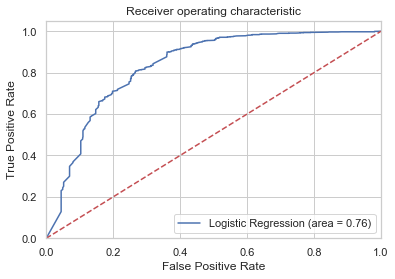

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [45]:
from sklearn.model_selection import StratifiedKFold, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

cv=StratifiedKFold(n_splits=5,random_state=5)

models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Logistic Regression', LogisticRegression()))


results = []
names = []
tabel=[]
for name, model in models:
    akurasi=cross_val_score(model, X, y,cv=cv)
    results.append(akurasi)
    names.append(name)
    hasil = "%s: %f" % (name, akurasi.mean())
    tabel.append(hasil)
tabel

C:\Users\asus\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\asus\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\asus\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\asus\AppData\Roamin

['CART: 0.800108',
 'KNN: 0.756810',
 'Naive Bayes: 0.770762',
 'SVM: 0.794559',
 'Random Forest: 0.802737',
 'Logistic Regression: 0.767022']